# Impulse Response Function

In this notebook we further investigate and exemplify the impulse response functions used in time series modelling of groundwater level. The impulse response functions discussed below are used in the GWTSA model. 

/Applications/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


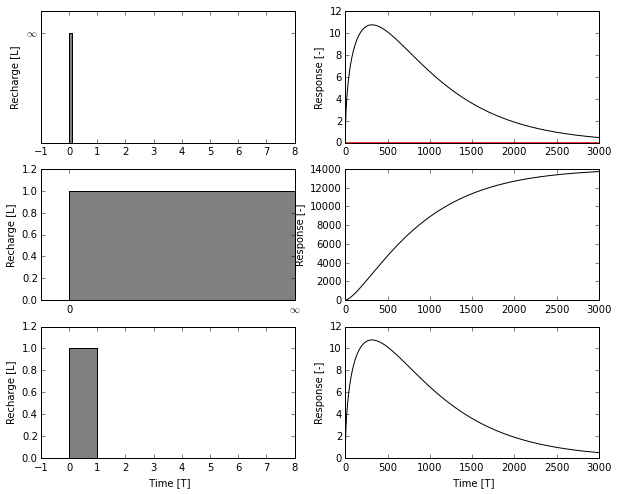

In [1]:
#Import packages for basic calculations and plotting
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammainc, gamma
%matplotlib inline

# Import packages for interactive plotting for increased understanding
from IPython.html.widgets import interact;
import IPython.html.widgets as widgets;

# First start with the input parameters

t = np.arange(0,3000.,1)
A = 1.
a = 1./10**2.8
n = 1.5

# Create the impulse response curve
X2 = A * ((a ** n) * (t ** (n-1)) * np.exp(-a*t)) / gamma(n)

# Create the step response curve
Fs = A * gammainc(n,t/a)

# Test of response function of Peterson et al. (2014)
A = 1.0
a = 10**2.8
X1 = A*t**(n-1)*np.exp(-t/a)
Fs = np.cumsum(A*t**(n-1)*np.exp(-t/a))

# Create the block response curve
Fb = Fs[1:] - Fs[0:-1]
Fb = np.append(0, Fb) #This is only done for drawing the graph as you normally
# Convolute 

plt.figure(figsize=(10,8))

plt.subplot(321)
plt.bar([0],[1],width=0.1, color='gray')
plt.xlim(-1,8)
plt.ylim(0,1.2)
plt.yticks([1],['$\infty$'])
plt.ylabel('Recharge [L]')
plt.subplot(322)
plt.plot(t,X1, 'k')
plt.plot(t,X2, 'r')
plt.ylabel('Response [-]')
plt.xlim(0,3000)


plt.subplot(323)
plt.bar([0],[1],width=8, color='gray')
plt.ylim(0,1.2)
plt.xlim(-1,8)
plt.xticks([0, 8],[0, '$\infty$'])
plt.ylabel('Recharge [L]')
plt.subplot(324)
plt.plot(np.arange(len(Fs)),Fs, 'k')
plt.ylabel('Response [-]')
plt.xlim(0,3000)


plt.subplot(325)
plt.bar([0],[1],width=1, color='gray')
plt.ylim(0,1.2)
plt.xlim(-1,8)
plt.ylabel('Recharge [L]')
plt.xlabel(' Time [T]')
plt.subplot(326)
plt.plot(np.arange(len(Fb)),Fb, 'k')
plt.ylabel('Response [-]')
plt.xlim(0,3000)
plt.xlabel(' Time [T]')

### Interactive example plot

We have now seen a static plot of the impulse, step and block response functions. In the following example an interactive plot is presented. The use can use the sliders to adapt the values of the block response function.

In [2]:
# Define a function that calculates and plots the impulse response function
def impulseresponse_plot(A=1,a=0.01,n=1.5):
    t = np.linspace(0,5000)
    Fs = A * gammainc(n,t/a) #Step Response Function
    Fb = Fs[1:] - Fs[0:-1] # Block Response Function
    Fb = np.append(0,Fb) #This is done for the visualisation, not for actual modelling!!
    plt.plot(t,Fb,'r')
    plt.xlabel('Time [days]')
    plt.ylabel('')
    plt.legend('IRF', loc = 1)
    return Fb

interact(impulseresponse_plot, 
        A = widgets.FloatSliderWidget(min = 0.01, max = 400, step =1, description = 'A', value = 10),
        a = widgets.FloatSliderWidget(min = 1, max = 1000, step =0.005, value = 0.01),
        n = widgets.FloatSliderWidget(min = 0.01, max = 10, step =0.10, value = 1.5))

AttributeError: FloatSliderWidget

315.47867224
10.7730273204


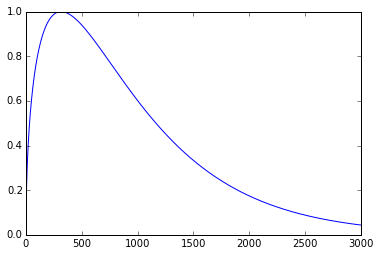

In [120]:
t = np.arange(0,3000.,1)
A = 1.
a = 10**2.8 # 1/a to change for Peterson
n = 1.5

def f(A,a,n,t):
    return A*t**(n-1)*np.exp(-t/a) #change /a to * a to comply with Peterson

t_peak = (n-1)*a #time of peak
print t_peak
value_tp = f(A,a,n,t_peak)
print value_tp

def f(A,a,n,t):
    Fs = A * gammainc(n, t/a) # Step response function based on pearsonIII
    Fb = np.append(0,Fs[1:] - Fs[0:-1]) #block reponse function
    #return Fb
    return (A*t**(n-1)*np.exp(-t/a))/(((n-1)*a)**(n-1)*np.exp(1-n))

plt.plot(f(A,a,n,t))

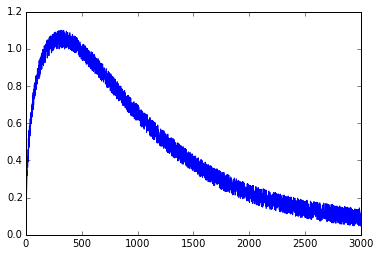

In [125]:
#Create some random shit
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy import random
x = random.rand(len(t))*0.1

f_test = f(A,a,n,t) + x

plt.plot(f_test)

In [126]:
# Define an objective function
def residuals(X0):
    A = X0['A'].value
    a = X0['a'].value
    n = X0['n'].value
    return (f(A,a,n,t)-f_test)

X0 = Parameters()
#           (Name,  Value,  Vary,   Min,  Max,  Expr)
X0.add_many(('A',   2.0,    True,   None, None,  None),
           ('a',    10**2.8,    True,   None, None,  None),
           ('n',    1.5,    True,   None, None,  None),
)

result = minimize(residuals, X0, method='leastsq')
report_fit(result)

#print residuals(X0)
param = result.params
print param

[[Fit Statistics]]
    # function evals   = 23
    # data points      = 3000
    # variables        = 3
    chi-square         = 2.953
    reduced chi-square = 0.001
[[Variables]]
    A:   1.03910243 +/- 0.001302 (0.13%) (init= 2)
    a:   722.260614 +/- 2.267416 (0.31%) (init= 630.9573)
    n:   1.43088669 +/- 0.002489 (0.17%) (init= 1.5)
[[Correlations]] (unreported correlations are <  0.100)
    C(a, n)                      = -0.878 
    C(A, a)                      = -0.407 
    C(A, n)                      =  0.142 
Parameters([('A', <Parameter 'A', value=1.0391024319207491 +/- 0.0013, bounds=[-inf:inf]>), ('a', <Parameter 'a', value=722.26061454111164 +/- 2.27, bounds=[-inf:inf]>), ('n', <Parameter 'n', value=1.4308866948773504 +/- 0.00249, bounds=[-inf:inf]>)])


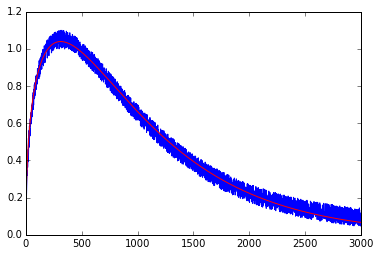

In [127]:
x1,x2,x3 = param['A'].value, param['a'].value, param['n'].value
plt.plot(f_test)
plt.plot(f(x1,x2,x3,t), 'r')

In [128]:
result.covar

array([[  1.69522769e-06,  -1.20186161e-03,   4.61093790e-07],
       [ -1.20186161e-03,   5.14117587e+00,  -4.95805373e-03],
       [  4.61093790e-07,  -4.95805373e-03,   6.19575802e-06]])

In [119]:
result.covar

array([[  4.18116854e-06,   3.86680719e-03,  -2.61606910e-06],
       [  3.86680719e-03,   9.05885143e+00,  -8.22919603e-03],
       [ -2.61606910e-06,  -8.22919603e-03,   9.71133113e-06]])